# Machine Learning Models

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [17]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [167]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [19]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA

In [56]:
ds = pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [250]:
#subsets
background = ['PB140: YEAR OF BIRTH','PB150: SEX','PB190: MARITAL STATUS','PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']

education = ['PE010: CURRENT EDUCATION ACTIVITY', 'PE040: HIGHEST ISCED LEVEL ATTAINED']

work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK', 'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION']

health = ['PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
      "PY090G++: SOCIAL BENEFITS"]
jobdiff=['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']


bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']


sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

subsets= [background,education,work,health,job,bneeds, sat]
columns = []
for x in subsets:
    for y in x:
        columns.append (y)
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION',
 'PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G++: SOCIAL BENEFITS',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/fami

# 0 Superfunctions

## 0.1 binning

In [89]:
def pbin(column_to_bin, x):
    bin_labels = [x for x in range(0,x)]

    equal_bins = pd.cut(ds[column_to_bin], x, labels = bin_labels)
    return equal_bins

def qbin(column_to_bin, x):
    bin_labels = [x for x in range(0,x)]

    equal_bins = pd.qcut(ds[column_to_bin], x, labels = bin_labels)
    return equal_bins

In [90]:
binned =pbin('PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',5)

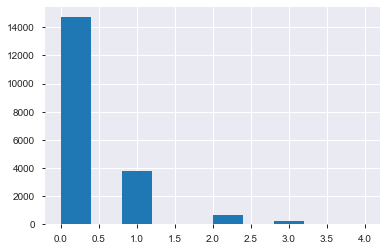

In [66]:
binned.hist()

## 0.2 generate train and test

In [168]:
### generate tests with several binning
# binning first
def generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):
    outcome = ds[y_interested]
    features = ds[X_interested]
    outcomelist=y_interested
    featureslist=X_interested
    data =pd.merge(features, outcome, left_index=True, right_index=True)
    
    # create dummy
    categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]
    


    create_dummy=set(featureslist).intersection(categorical)
    data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
    if dummy=='yes':
        data = data_dummy
    
    ## drop na in outcome
    if drop_na_in_y == 'yes':
        data = data[data[outcomelist]>=0]
    
    ## split dataset again in x and y
    XCol=list(data.columns)
    XCol.remove(outcomelist)
    YCol=outcomelist
    Xtouse = data[XCol]
    y= data[YCol]

    
    # scaler
    if scalertouse == "Standard":
        scaler = StandardScaler()
        X_ = scaler.fit_transform(Xtouse)
    elif scalertouse == "MinMax":
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    elif scalertouse == "Normalizer":
        scaler = Normalizer()
        X_ = scaler.fit_transform(Xtouse)
        X_.shape
    else: 
        X_ = Xtouse
    
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

## 0.2  Regression

In [75]:
# maxximize function to split and run all the models:

def runmodels (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):

    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[3]

    
    print("X: ", X_train.columns)
    print("Y: ", y_interested,"\n")
    
    # Linear Regression
    lm = LinearRegression()
    model = lm.fit(X_train,y_train)

    print("Intercept: ", lm.intercept_)
    print("Coef: ", lm.coef_)

    y_pred  = lm.predict(X_test)
    print ("linear aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("linear MSE: ",mean_squared_error(y_test, y_pred))
    print ("linear R2: ",r2_score(y_test, y_pred), "\n")
    
    
    ### Regression Tree
    regr = DecisionTreeRegressor(random_state = 29)
    model = regr.fit(X_train, y_train)
    y_pred  = regr.predict(X_test)
    regr.score(X_test, y_test)
    print ("Regression Tree aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("Regression Tree MSE: ",mean_squared_error(y_test, y_pred))
    print ("Regression Tree R2: ",r2_score(y_test, y_pred),"\n")
    
    ### KNeighborsRegressor
    knnr = KNeighborsRegressor(n_neighbors = 3)
    model = knnr.fit(X_train, y_train)  #fit the model
    y_pred = knnr.predict(X_test)
    print ("KNeighbores aMSE: ", mean_absolute_error(y_test, y_pred))
    print ("KNeighbores MSE: ",mean_squared_error(y_test, y_pred))
    print ("KNeighbores R2: ",r2_score(y_test, y_pred))

In [77]:
runmodels(bneeds,'PW130: TRUST IN THE POLITICAL SYSTEM', 'yes', 'yes', 'no')

X:  Index(['PD030: Two pairs of properly fitting shoes_2.0',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones_2.0',
       'PD070: Spend a small amount of money each week on yourself_2.0',
       'PD080: Internet connection for personal use at home_2.0',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_2.0',
       'PD060: Regularly participate in a leisure activity_2.0'],
      dtype='object')
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 

Intercept:  4.984384562401287
Coef:  [ 0.02016619 -0.00973691 -0.04906928 -0.0362208  -0.05120821 -0.07853531]
linear aMSE:  2.170278705576961
linear MSE:  6.897439068685686
linear R2:  -0.001986555329586137 

Regression Tree aMSE:  2.178726858607019
Regression Tree MSE:  6.934787386037485
Regression Tree R2:  -0.007412121467688548 

KNeighbores aMSE:  2.5680542315432686
KNeighbores MSE:  10.15538608198284
KNeighbores R2:  -0.47526643106206845


## 0.4  Classification

In [78]:
# maxximize function to split and run all the models:
## y binning first
def class_bin (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):

    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[3]

    
    print("X: ", X_train.columns)
    print("Y: ", y_interested,"\n")
    
    # logistic regression
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    print(matrix)
    print( "Logistic regression - accuracy: ", str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
    print( "Logistic regression - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n")

    # Decision Tree classyier
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    print(matrix)
    print( "Decision tree - accuracy  ", str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
    print( "Decision tree - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n")  
      
    # super vector machine (takes too much time)                                          
                                                   
    # KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf=confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    matrix = pd.DataFrame([[tp, tn, (tp+tn),round((tp+tn)/(tp+tn+fp+fn)*100,2)],[fp, fn, (fp+fn), ]], index = ["true", "false"], columns=['positive', 'negative', 'total','accuracy'])
    print(matrix)
    print( "KNeighborsClassifier - accuracy  ", str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
    print( "KNeighborsClassifier - precision", str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)), "\n") 

In [80]:
class_bin(background, 'PW130: TRUST IN THE POLITICAL SYSTEM', 'yes' , 'yes', 'MaxMin')

X:  Index(['PB140: YEAR OF BIRTH', 'PB200: CONSENSUAL UNION_2',
       'PB200: CONSENSUAL UNION_3', 'PB220A: CITIZENSHIP_1',
       'PB190: MARITAL STATUS_2.0', 'PB190: MARITAL STATUS_3.0',
       'PB190: MARITAL STATUS_4.0', 'PB190: MARITAL STATUS_5.0',
       'PB150: SEX_2'],
      dtype='object')
Y:  PW130: TRUST IN THE POLITICAL SYSTEM 



C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: too many values to unpack (expected 4)

In [164]:
## target multi
# binning first
def class_mul (X_interested,y_interested, dummy, drop_na_in_y, scalertouse):
    
    X_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[0]
    X_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)[1]
    y_train = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[2]
    y_test = generateTest (X_interested,y_interested, dummy, drop_na_in_y,  scalertouse)[3]

    
    print("X: ", X_interested)
    print("X: ", y_interested)
    
    #### b) DecisionTree Classify

    dtc = DecisionTreeClassifier()#class_weight='balanced')#max_features=10,
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)

    acc = dtc.score(X_test, y_test)*100
    print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
 

    #### c) Support Vector Maschine
    svm = SVC(decision_function_shape='ovo')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = svm.score(X_test,y_test)*100
    print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

In [122]:
class_mul(background, sat[0], 'yes' , 'no', 'MaxMin')

X:  ['PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS', 'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP']
X:  PW010: OVERALL LIFE SATISFACTION
Decision Tree Test Accuracy 3.65%


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Algorithm Test Accuracy 26.87%


## 0.4 RFE

In [261]:
def generateRFE (X_train, y_train, limit): 
    auto_model = LinearRegression()
    selector = RFE(auto_model, 5, step=1)
    model = selector.fit(X_train,y_train)
    selector.ranking_
    rfe_col = []
    for x in range(len(X_train.columns)):
        if selector.ranking_[x]<=limit:
            rfe_col.append(X_train.columns[x])
    print(len(rfe_col))
    return rfe_col

# 1. apply to models

## 1.1 model 1 "political satisfaction"

In [180]:
# refresh ds
def reload():
    return pd.read_csv('./data/datamax_cleaned.csv', index_col=0)

In [174]:
columns

['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION',
 'PH010: GENERAL HEALTH',
 'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G++: SOCIAL BENEFITS',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/fami

In [175]:
try1 = ['PB140: YEAR OF BIRTH',
 'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PE040: HIGHEST ISCED LEVEL ATTAINED',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PH010: GENERAL HEALTH',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY090G++: SOCIAL BENEFITS',
 'PD080: Internet connection for personal use at home','PW010: OVERALL LIFE SATISFACTION']

ds['PB140: YEAR OF BIRTH']= pbin('PB140: YEAR OF BIRTH',3)
ds['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME']= pbin('PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',3)
ds['PY090G++: SOCIAL BENEFITS']= pbin('PY090G++: SOCIAL BENEFITS',3)
ds['PW010: OVERALL LIFE SATISFACTION']=pbin('PW010: OVERALL LIFE SATISFACTION',3)
## based on rfe
try2 = ['PB150: SEX',
 'PB190: MARITAL STATUS',
 'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY090G++: SOCIAL BENEFITS',
 'PD080: Internet connection for personal use at home']

In [212]:
## based on RFE all columns
try3 = ['PE010: CURRENT EDUCATION ACTIVITY',
 'PL150: MANAGERIAL POSITION',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD070: Spend a small amount of money each week on yourself',
 'PW070: FEELING CALM AND PEACEFUL',
 'PW220: PHYSICAL SECURITY']

In [ ]:
### select features
xes =try4
yli = 'PW130: TRUST IN THE POLITICAL SYSTEM'

In [266]:
## binnen
#pbin(column_to_bin, x)
#qbin(column_to_bin, x)
for x in xes: 
    print(x, ds[x].unique())

KeyError: 'PL051: OCCUPATION (ISCO-08 (COM))_14.0'

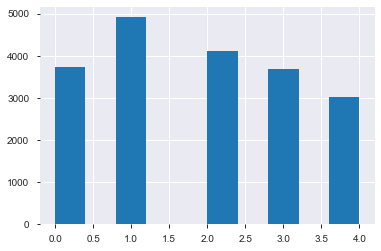

In [214]:
## bin y
ds[yli]= pbin(yli,5)
#ds[yli].unique()
ds[yli].hist()


## other way of binning
ds=reload()
ds[yli]=ds[yli].apply(lambda x: 2 if (x <=2) & (x!=-1) else x)
ds[yli]=ds[yli].apply(lambda x: 4 if (x ==3) & (x==4) else x)
ds[yli]=ds[yli].apply(lambda x: 4 if (x ==3) & (x==4) else x)
ds[yli] =ds[yli].apply(lambda x: 6 if ((x ==6) | (x==7)) else x)
ds[yli].unique()
ds[yli].hist()

In [118]:
### generate test-set
#generateTest (X_interested,y_interested, dummy, drop_na_in_y, scalertouse)
#generateTest (xes,yli, 'yes', 'no', 'MinMax')

In [268]:
## multi clas
class_mul(xes, yli, 'no','no','Normalizer')

KeyError: "None of [Index(['PL051: OCCUPATION (ISCO-08 (COM))_14.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_22.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_32.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_34.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_35.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_44.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_54.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_61.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_82.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_83.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_92.0',\n       'PL051: OCCUPATION (ISCO-08 (COM))_96.0',\n       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT_1',\n       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_11.0'],\n      dtype='object')] are in the [columns]"

In [221]:
xes = columns.remove(yli)
generateTest (columns,yli, 'yes', 'yes', 'Normalizer')

(array([[1.26738066e-01, 1.90966448e-04, 1.27310965e-04, ...,
         0.00000000e+00, 0.00000000e+00, 6.36554825e-05],
        [5.96253394e-01, 9.21091751e-04, 6.14061167e-04, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.93995340e-01, 3.03989427e-04, 6.07978854e-04, ...,
         0.00000000e+00, 3.03989427e-04, 3.03989427e-04],
        ...,
        [2.12403259e-01, 5.37457638e-04, 3.22474583e-04, ...,
         0.00000000e+00, 1.07491528e-04, 0.00000000e+00],
        [7.89115049e-02, 2.02857339e-04, 8.11429357e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.42331343e-02, 1.13128221e-04, 1.13128221e-04, ...,
         0.00000000e+00, 2.26256442e-05, 0.00000000e+00]]),
 array([[9.98572939e-01, 2.54089806e-03, 5.08179613e-04, ...,
         0.00000000e+00, 0.00000000e+00, 5.08179613e-04],
        [3.38685134e-02, 5.11094266e-05, 3.40729511e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.77885967e-01, 

In [257]:
##RFE asll
ds=reload()

categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]
#columns.remove(yli)
create_dummy=set(columns).intersection(categorical)
create_dummy

{'PB150: SEX',
 'PB190: MARITAL STATUS',
 'PB200: CONSENSUAL UNION',
 'PB220A: CITIZENSHIP',
 'PD020: Replace worn-out clothes by some new (not second-hand) ones',
 'PD030: Two pairs of properly fitting shoes',
 'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
 'PD060: Regularly participate in a leisure activity',
 'PD070: Spend a small amount of money each week on yourself',
 'PD080: Internet connection for personal use at home',
 'PE010: CURRENT EDUCATION ACTIVITY',
 'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
 'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
 'PL051: OCCUPATION (ISCO-08 (COM))',
 'PL150: MANAGERIAL POSITION'}

In [263]:
data_dummy = pd.get_dummies(ds[columns], columns=create_dummy, drop_first=True)
data_dummy.columns

data_dummy

generateRFE(data_dummy, ds[yli], 10)

14


['PL051: OCCUPATION (ISCO-08 (COM))_14.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_22.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_32.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_34.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_35.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_44.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_54.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_61.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_82.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_83.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_92.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_96.0',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT_1',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_11.0']

In [ ]:
try4 = ['PL051: OCCUPATION (ISCO-08 (COM))_14.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_22.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_32.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_34.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_35.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_44.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_54.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_61.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_82.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_83.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_92.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_96.0',
 'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT_1',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_11.0'
        

In [274]:
X = data_dummy[try4]
y= ds[yli]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [276]:
#### b) DecisionTree Classify

dtc = DecisionTreeClassifier()#class_weight='balanced')#max_features=10,
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")
 

#### c) Support Vector Maschine
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 19.83%


C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Algorithm Test Accuracy 20.01%


#### did not improve

# Stepwise as Backup
# 1 Data Selection and Preperation

#### 1.1. define features and Y

In [ ]:
outcome = ds['PW010: OVERALL LIFE SATISFACTION']
features = ds[background]
outcomelist='PW010: OVERALL LIFE SATISFACTION'
featureslist=background

In [ ]:
data =pd.merge(features, outcome, left_index=True, right_index=True)

In [ ]:
data.head()

#### 1.2 make lefts skewed X categorical

In [ ]:
shouldbecategorical= main_list = list(set(data.columns)-set(categorical)-set([outcomelist]))

#### 1.3 create dummies

In [336]:
categorical= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]

create_dummy=set(featureslist).intersection(categorical)

data_dummy = pd.get_dummies(data, columns=create_dummy, drop_first=True)
data_dummy.columns

Index(['PB140: YEAR OF BIRTH', 'PW010: OVERALL LIFE SATISFACTION',
       'PB200: CONSENSUAL UNION_2', 'PB200: CONSENSUAL UNION_3',
       'PB220A: CITIZENSHIP_1', 'PB150: SEX_2', 'PB190: MARITAL STATUS_2.0',
       'PB190: MARITAL STATUS_3.0', 'PB190: MARITAL STATUS_4.0',
       'PB190: MARITAL STATUS_5.0'],
      dtype='object')

In [337]:
# use dummy:
data = data_dummy

# not use dummy:
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)

# 2. Regression

#### <font color=red>here decide to keep or drop nan in the outcome: </font>

In [338]:
## drop nan
#data = data[data[outcomelist]>=0]

#reset 
#data = data =pd.merge(features, outcome, left_index=True, right_index=True)

In [339]:
XCol=list(data.columns)
XCol.remove(outcomelist)
YCol=outcomelist

In [340]:
X = data[XCol]
y= data[YCol]

•	imbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning


### 2.1 Test for imbalancing in Y

In [341]:
YCol

'PW010: OVERALL LIFE SATISFACTION'

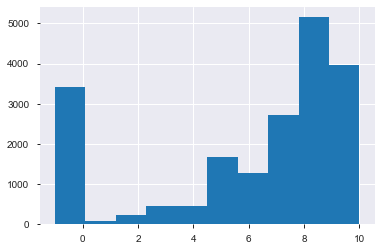

In [342]:
y.hist()

## it is very imbalanced  --> bin the values bellow 5 and change *dont know" to other value

In [343]:
#y.loc[(y['PW130: TRUST IN THE POLITICAL SYSTEM']==-1), 'PW130: TRUST IN THE POLITICAL SYSTEM']= X

#### <font color=red>here decide how to bin y: </font>

In [344]:
y_binned=y.apply(lambda x: 4.5 if (x <=5) & (x!=-1) else x)
y_binned =y_binned.apply(lambda x: 6.5 if ((x ==6) | (x==7)) else x)
y_binned.unique()

array([ 8. ,  6.5, 10. ,  4.5, -1. ,  9. ])

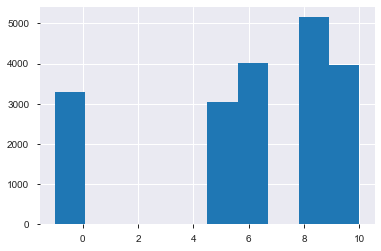

In [345]:
y_binned.hist()


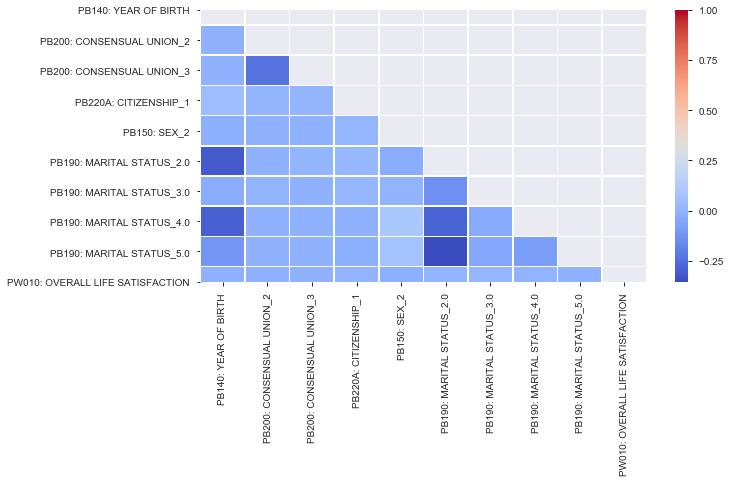

In [346]:
### just to check correlation
dset = pd.merge(X, y, left_index=True, right_index=True)


plt.figure(figsize =(10,5))
corr = dset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

## 2.2. Scale

#### <font color=red>here decide to scale x or not and if yes which one: </font>

In [347]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape
X.columns

Index(['PB140: YEAR OF BIRTH', 'PB200: CONSENSUAL UNION_2',
       'PB200: CONSENSUAL UNION_3', 'PB220A: CITIZENSHIP_1', 'PB150: SEX_2',
       'PB190: MARITAL STATUS_2.0', 'PB190: MARITAL STATUS_3.0',
       'PB190: MARITAL STATUS_4.0', 'PB190: MARITAL STATUS_5.0'],
      dtype='object')

In [348]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)
X_minmax.shape


(19463, 9)

## 2.3 Split

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2)

## 2.4 run different models

#### a) Prepare Model 

In [ ]:
## prepare interaction term
for d in range(2):
    interaction = PolynomialFeatures(degree = d, include_bias = False, interaction_only = True)
    X_inter = interaction.fit_transform(X_train)

#### b)  Linear Regression Model

In [ ]:

lm = LinearRegression()
model = lm.fit(X_train,y_train)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### c)  Taylor (pipeline)

#for k in range(1,8):
poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=3, include_bias = False, interaction_only = True), LinearRegression())

model = poly_model.fit(X_train, y_train)

    
print(poly_model.score(X_test, y_test))

y_pred  = poly_model.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### c)  Regression Tree

In [ ]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

In [ ]:
#r = export_text(regr, feature_names=list(X.columns))
#print(r)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)


In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [ ]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### <font color=red>huge means squared_error and negative r squared for binned and unbinned y
     also failed with drop nan, but way better!
    also failed with feature elimination

</font>

# 3. optimize recursive feature elimination (RFE)

In [ ]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [ ]:
generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[0]

Fit the model and print the ranking

In [353]:
generateRFE(generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[0],generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[2])

[72 52 65 39 75 73 74 76 41 69  1 26 51  5 43 15  1 11 40 45 42 13  1 70
 24 46 12 31 68 66 44 14 10  7 36  4 60  3 18  1  1 33  9 34  2  8 38 23
 53 37 21 20 57 35 71 19 59 56 16  6 58 25 61 62 32 50 54 67 48 49 27 64
 22 63 47 55 29 30 28 17]
14


['PL051: OCCUPATION (ISCO-08 (COM))_13.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_22.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_25.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_35.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_62.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_71.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_73.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_75.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_82.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_83.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_92.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_94.0',
 'PL051: OCCUPATION (ISCO-08 (COM))_96.0',
 'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_10.0']

In [ ]:
# Your code here:
auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[0],generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[2])

In [ ]:
# Your code here:
selector.ranking_
#selector.support_

In [ ]:
Xhere = generateTest(columns[:-20],outcomelist, 'yes', 'yes', 'yes', 'no')[0]
rfe_col = []
for x in range(len(Xhere.columns)):
    if selector.ranking_[x]<=10:
        rfe_col.append(Xhere.columns[x])
print(len(rfe_col))
rfe_col

In [ ]:
X=data[columns]
X.columns

In [ ]:
test = X
test['YY'] = ytogo
plt.figure(figsize =(10,10))
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)
## --> run 2.2 split and 2.3 models again

## 2.3 PCA

In [ ]:
X = data[XCol]
X.shape

In [ ]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastI-CA(n_components=0.99, whit-en=True)

# Conduct PCA
features_pca = pca.fit_transform(X)

In [ ]:
X= features_pca
X.shape
## --> run 2.2 split and 2.3 models again

## 2. Classification

### 2.1.1 prepare data

In [ ]:
# change outcome variable to a 2 classification variable:
# drop -1
# based on ds_1
data = ds_1

data =data[data['PW130: TRUST IN THE POLITICAL SYSTEM']!=-1]
data.shape
ds_1.shape[0]-data.shape[0]

In [ ]:
data['Y_class']= data['PW130: TRUST IN THE POLITICAL SYSTEM'].apply(lambda x: 1 if x>=8 else 0)

In [ ]:
data['Y_class'].hist()
data['Y_class'].value_counts()
## --> balanced more or less

In [ ]:
XCol=data.columns[:-2]
YCol=data.columns[-1]

print(len(XCol))
print(YCol)

In [ ]:
X = data[XCol]
y= data[YCol]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_test.shape


#### a) Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


y_pred=lr.predict(X_test)

In [ ]:
acc = lr.score(X_test,y_test)
acc

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()
### it predicts all as 1...

#### b) DecisionTree Classify

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [ ]:
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

In [ ]:
## overfitting!!!

#### c) Support Vector Maschine

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

#### d) K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
acc = knn.score(X_test, y_test)*100
acc

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))
